In [ ]:
!pip install rembg onnxruntime opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
from rembg import remove
from PIL import Image
import io

input_path = '/content/p2.jpg'
output_path = 'p2_nobg.png'

with open(input_path, 'rb') as i:
    input_data = i.read()
    output_data = remove(input_data)

with open(output_path, 'wb') as o:
    o.write(output_data)

print("Background removed successfully!")


Background removed successfully!


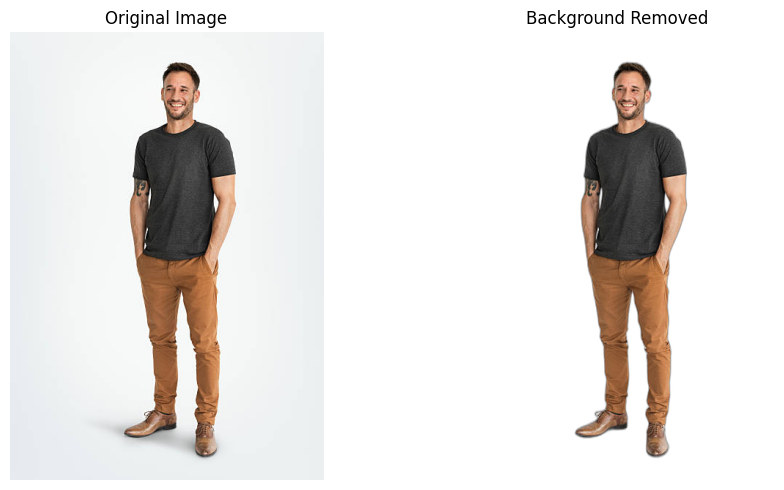

In [ ]:
# Load images for display
fg_path = "/content/p2_nobg_square.png"
original = Image.open(input_path).convert("RGB")
removed_bg = Image.open(io.BytesIO(output_data)).convert("RGBA")

# Show side-by-side using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(removed_bg)
plt.title('Background Removed')
plt.axis('off')

plt.tight_layout()
plt.show()


### No Adjustments


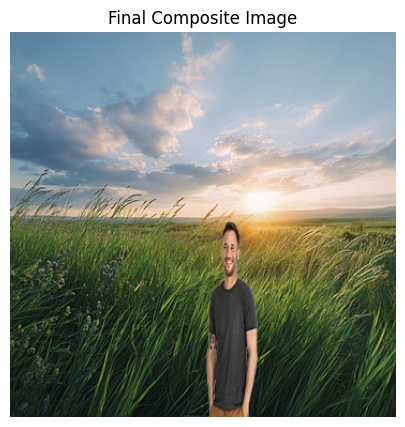

In [ ]:
from PIL import Image

# Load background and foreground
background = Image.open("/content/bg.jpg").convert("RGBA")
foreground = Image.open("/content/p2_nobg_square.png").convert("RGBA")

# Resize foreground (optional: based on scene scale)
foreground = foreground.resize((200, 400))  # Adjust size to fit naturally

# Define position where person will be pasted on background
position = (100, 150)  # (x, y) — you can tweak these values

# Composite images
composite = background.copy()
composite.paste(foreground, position, foreground)

# Save and show
composite.save("final_composite.png")

# Display
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(composite)
plt.title("Final Composite Image")
plt.axis('off')
plt.show()


### Adustment

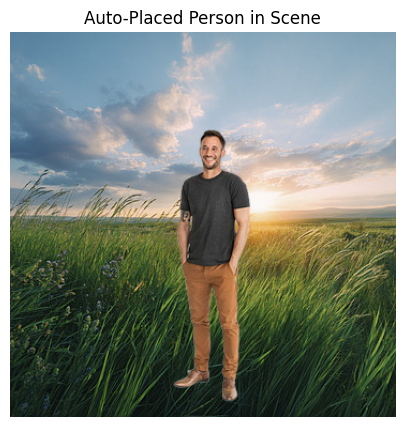

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load images
bg_path = "/content/bg.jpg"
fg_path = "/content/p2_nobg_square.png"

background = Image.open(bg_path).convert("RGBA")
foreground = Image.open(fg_path).convert("RGBA")

# Get dimensions
bg_width, bg_height = background.size
fg_width, fg_height = foreground.size

# Scale foreground to be ~60% of background height
target_fg_height = int(bg_height * 0.8)
scaling_factor = target_fg_height / fg_height
target_fg_width = int(fg_width * scaling_factor)

# Resize foreground
foreground = foreground.resize((target_fg_width, target_fg_height), resample=Image.LANCZOS)

# Position the person: horizontally center, bottom-aligned with margin
margin_bottom = 0
x = (bg_width - target_fg_width) // 2
y = bg_height - target_fg_height - margin_bottom

# Paste person onto background using alpha channel
composite = background.copy()
composite.paste(foreground, (x, y), foreground)

# Save and show
composite.save("final_composite_auto.png")

plt.figure(figsize=(10, 5))
plt.imshow(composite)
plt.title("Auto-Placed Person in Scene")
plt.axis('off')
plt.show()
